Message: Hello, can you please help me? - Classification: genuine
Message: I love governance and global politics! - Classification: genuine
Message: Need your assistance. - Classification: genuine
Message: Buy now, limited time offer! - Classification: spam
Message: Just wanted to say hi. - Classification: genuine
Message: Claim your free gift! - Classification: spam
Message: I have a question. - Classification: spam
Message: Make money fast! - Classification: spam
Message: Thank you for your support. - Classification: genuine
Message: Unlock exclusive benefits. - Classification: spam
Message: Let's catch up soon. - Classification: genuine
Message: You're a lucky winner! - Classification: spam
Message: I need your guidance. - Classification: genuine
Message: Limited time sale! - Classification: spam
Message: Impressive! Do you know that you can win a lottery now? - Classification: spam
Message: Become a millionaire! - Classification: spam
Message: Invest, refer five persons and get a b

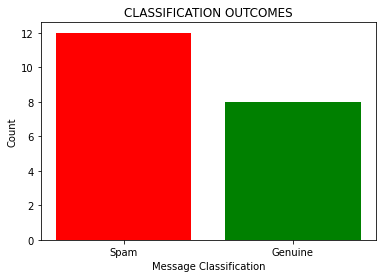

In [10]:
import matplotlib.pyplot as plt
from collections import defaultdict
import re as regExp

class MultinomialNaiveBayesClassifier:
    def __init__(self):
        self.classes = defaultdict(int)
        self.class_word_counts = defaultdict(lambda: defaultdict(int))
        self.vocabulary = set()

    def train(self, training_data):
        for message, label in training_data:
            self.classes[label] += 1
            words = self.preprocess_text(message)
            for word in words:
                self.class_word_counts[label][word] += 1
                self.vocabulary.add(word)

    def classify(self, message):
        words = self.preprocess_text(message)
        probabilities = {}
        for label in self.classes:
            class_prob = self.classes[label] / sum(self.classes.values())
            word_probs = 1.0
            for word in words:
                word_prob = (self.class_word_counts[label][word] + 1) / (sum(self.class_word_counts[label].values()) + len(self.vocabulary))
                word_probs *= word_prob
            probabilities[label] = class_prob * word_probs

        return max(probabilities, key=probabilities.get)

    def preprocess_text(self, text):
        words = regExp.findall(r'\b\w+\b', text.lower())
        return words

# Example usage
training_data = [
    ("Hello, how are you?", "genuine"),
    ("Free money! Claim now.", "spam"),
    ("Need your help with something.", "genuine"),
    ("Get rich quick!", "spam"),
    ("Hi there, just checking in.", "genuine"),
    ("Limited time offer! Buy now.", "spam"),
    ("Can you please send me the file?", "genuine"),
    ("Make money from home.", "spam"),
    ("I appreciate your help.", "genuine"),
    ("Exclusive deal for you!", "spam"),
    ("Let's meet for coffee.", "genuine"),
    ("You've won a lottery!", "spam"),
    ("Thanks for your assistance.", "genuine"),
    ("Special discount on selected items.", "spam"),
    ("Please reply as soon as possible.", "genuine"),
    ("Earn money with this amazing opportunity!", "spam"),
    ("Could you please provide more details?", "genuine"),
    ("Limited stock available.", "spam"),
    ("Looking forward to hearing from you.", "genuine"),
    ("Don't miss out on this offer!", "spam"),
]

# Create and train the classifier
classifier = MultinomialNaiveBayesClassifier()
classifier.train(training_data)

test_messages = [
    "Hello, can you please help me?",
    "I love governance and global politics!",
    "Need your assistance.",
    "Buy now, limited time offer!",
    "Just wanted to say hi.",
    "Claim your free gift!",
    "I have a question.",
    "Make money fast!",
    "Thank you for your support.",
    "Unlock exclusive benefits.",
    "Let's catch up soon.",
    "You're a lucky winner!",
    "I need your guidance.",
    "Limited time sale!",
    "Impressive! Do you know that you can win a lottery now?",
    "Become a millionaire!",
    "Invest, refer five persons and get a bonus.",
    "Huge discounts available now!",
    "Can we set up a meeting?",
    "Last chance to save big!",
]

for message in test_messages:
    classification = classifier.classify(message)
    print(f"Message: {message} - Classification: {classification}")

# Train the classifier
classifier = MultinomialNaiveBayesClassifier()
classifier.train(training_data)

# Classify the test messages
results = []
for message in test_messages:
    classification = classifier.classify(message)
    results.append((message, classification))

# Prepare the data for visualization
spam_count = sum(1 for _, label in results if label == "spam")
genuine_count = sum(1 for _, label in results if label == "genuine")
labels = ["Spam", "Genuine"]
counts = [spam_count, genuine_count]
colors = ["red", "green"]

print(f"\nNumber of Spam Messages: {spam_count}\nNumber of Genuine Messages: {genuine_count}\n")
# Plot the results
plt.bar(labels, counts, color=colors)
plt.xlabel("Message Classification")
plt.ylabel("Count")
plt.title("CLASSIFICATION OUTCOMES")
plt.show()

In [ ]:
<b>MULTINOMIAL NAIVE BAYES</b>

C:\Users\hp\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\hp\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1870: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\hp\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


Message: Hello, can you please help me with something? - Classification: genuine
Message: Congratulations! You've won a prize! - Classification: genuine
Message: I need your assistance urgently. - Classification: genuine
Message: Buy now, limited time offer! - Classification: genuine
Message: Just wanted to say hi. - Classification: genuine
Message: Claim your free gift! - Classification: genuine
Message: I have a question for you. - Classification: genuine
Message: Make money fast and easy! - Classification: genuine
Message: Thank you for your support. - Classification: genuine
Message: Unlock exclusive benefits. - Classification: genuine
Message: Let's catch up soon. - Classification: genuine
Message: You're a lucky winner! - Classification: genuine
Message: I need your guidance. - Classification: genuine
Message: Limited time sale! - Classification: genuine
Message: Please respond as soon as possible. - Classification: genuine
Message: Become a millionaire! - Classification: genuine

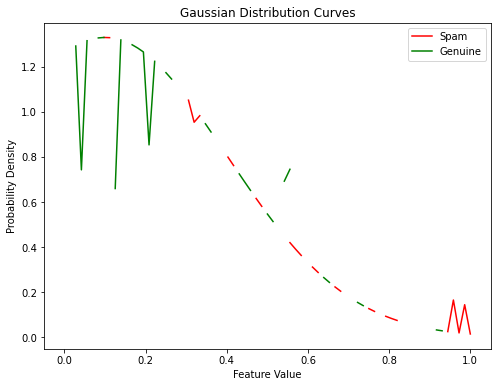

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

class GaussianNaiveBayesClassifier:
    def __init__(self):
        self.classes = {}
        self.class_priors = {}

    def train(self, training_data):
        features, labels = zip(*training_data)
        self.classes = {label: [] for label in set(labels)}
        self.class_priors = {}

        for label in labels:
            self.class_priors[label] = self.class_priors.get(label, 0) + 1

        for label in self.classes:
            class_features = [features[i] for i in range(len(features)) if labels[i] == label]
            class_features = np.vstack(class_features)
            self.classes[label] = {
                'mean': np.mean(class_features, axis=0),
                'std': np.std(class_features, axis=0)
            }

        total_samples = sum(self.class_priors.values())
        for label in self.class_priors:
            self.class_priors[label] /= total_samples

    def classify(self, features):
        probabilities = {}
        for label in self.classes:
            class_prior = self.class_priors[label]
            class_mean = self.classes[label]['mean']
            class_std = self.classes[label]['std']
            class_likelihood = np.prod(norm.pdf(features, class_mean, class_std.reshape(1, -1)), axis=1)
            probabilities[label] = class_prior * class_likelihood

        return max(probabilities, key=probabilities.get)

# Example usage
training_data = [
    ("Hello, how are you today?", "genuine"),
    ("Free money! Claim now.", "spam"),
    ("Need your assistance.", "genuine"),
    ("Get rich quick!", "spam"),
    ("Hi, just checking in.", "genuine"),
    ("Limited time offer! Buy now.", "spam"),
    ("Can you send me the file?", "genuine"),
    ("Make money from home.", "spam"),
    ("Thanks for your help.", "genuine"),
    ("Exclusive deal for you!", "spam"),
    ("Let's meet for coffee.", "genuine"),
    ("You've won a prize!", "spam"),
    ("Thanks for your assistance.", "genuine"),
    ("Special discount on selected items.", "spam"),
    ("Please reply as soon as possible.", "genuine"),
    ("Earn money with this opportunity!", "spam"),
    ("Could you provide more details?", "genuine"),
    ("Limited stock available.", "spam"),
    ("Looking forward to hearing from you.", "genuine"),
    ("Don't miss out!", "spam"),
]

test_messages = [
    "Hello, can you please help me with something?",
    "Congratulations! You've won a prize!",
    "I need your assistance urgently.",
    "Buy now, limited time offer!",
    "Just wanted to say hi.",
    "Claim your free gift!",
    "I have a question for you.",
    "Make money fast and easy!",
    "Thank you for your support.",
    "Unlock exclusive benefits.",
    "Let's catch up soon.",
    "You're a lucky winner!",
    "I need your guidance.",
    "Limited time sale!",
    "Please respond as soon as possible.",
    "Become a millionaire!",
    "Looking for some advice.",
    "Huge discounts available now!",
    "Can we set up a meeting?",
    "Last chance to save big!",
]

# Convert messages to numerical features using bag-of-words representation
def convert_to_features(messages, unique_words):
    features = []
    for message in messages:
        word_counts = {word: 0 for word in unique_words}
        for word in message.lower().split():
            if word in word_counts:
                word_counts[word] += 1
        features.append(list(word_counts.values()))
    return features

# Get unique words from both training classes
unique_words = set()
for message, _ in training_data:
    unique_words.update(message.lower().split())

# Convert training and test messages to features
training_features = convert_to_features([msg for msg, _ in training_data], unique_words)
test_features = convert_to_features(test_messages, unique_words)

# Create and train the classifier
classifier = GaussianNaiveBayesClassifier()
classifier.train(list(zip(training_features, [label for _, label in training_data])))

# Classify the test messages
for message in test_messages:
    predicted_label = classifier.classify(test_features[0])
    print(f"Message: {message} - Classification: {predicted_label}")

# Plot the results
plt.figure(figsize=(8, 6))

# Plot the Gaussian distribution curve for spam
spam_mean = classifier.classes["spam"]["mean"]
spam_std = classifier.classes["spam"]["std"]
spam_curve = norm.pdf(np.linspace(0, 1, 73), spam_mean, spam_std)
plt.plot(np.linspace(0, 1, 73), spam_curve, color="red", label="Spam")


genuine_mean = classifier.classes["genuine"]["mean"]
genuine_std = classifier.classes["genuine"]["std"]
genuine_curve = norm.pdf(np.linspace(0, 1, 73), genuine_mean, genuine_std)
plt.plot(np.linspace(0, 1, 73), genuine_curve, color="green", label="Genuine")

plt.xlabel("Feature Value")
plt.ylabel("Probability Density")
plt.title("Gaussian Distribution Curves")
plt.legend()
plt.show()

Features: [4.9, 3.1, 1.5, 0.1] - Classification: genuine
Features: [6.2, 2.8, 4.8, 1.8] - Classification: genuine
Features: [5.0, 3.3, 1.4, 0.2] - Classification: genuine


C:\Users\hp\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\hp\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1870: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


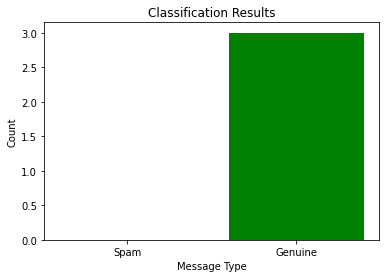

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

class GaussianNaiveBayesClassifier:
    def __init__(self):
        self.classes = {}
        self.class_priors = {}

    def train(self, training_data):
        features, labels = zip(*training_data)
        self.classes = {label: [] for label in set(labels)}
        self.class_priors = {}

        for label in labels:
            self.class_priors[label] = self.class_priors.get(label, 0) + 1

        for label in self.classes:
            class_features = [features[i] for i in range(len(features)) if labels[i] == label]
            self.classes[label] = {
                'mean': np.mean(class_features, axis=0),
                'std': np.std(class_features, axis=0)
            }

        total_samples = sum(self.class_priors.values())
        for label in self.class_priors:
            self.class_priors[label] /= total_samples

    def classify(self, features):
        probabilities = {}
        for label in self.classes:
            class_prior = self.class_priors[label]
            class_mean = self.classes[label]['mean']
            class_std = self.classes[label]['std']
            class_likelihood = np.prod(norm.pdf(features, class_mean, class_std))
            probabilities[label] = class_prior * class_likelihood

        return max(probabilities, key=probabilities.get)

# Example usage
training_data = [
    ([3.4, 2.9, 1.4, 0.2], "genuine"),
    ([5.1, 3.5, 1.4, 0.2], "genuine"),
    ([4.9, 3.0, 1.4, 0.2], "genuine"),
    ([4.7, 3.2, 1.3, 0.2], "genuine"),
    ([4.6, 3.1, 1.5, 0.2], "genuine"),
    ([6.3, 3.3, 6.0, 2.5], "spam"),
    ([5.8, 2.7, 5.1, 1.9], "spam"),
    ([7.1, 3.0, 5.9, 2.1], "spam"),
    ([6.3, 2.9, 5.6, 1.8], "spam"),
    ([6.5, 3.0, 5.8, 2.2], "spam")
]

# Create and train the classifier
classifier = GaussianNaiveBayesClassifier()
classifier.train(training_data)

test_features = [[4.9, 3.1, 1.5, 0.1], [6.2, 2.8, 4.8, 1.8], [5.0, 3.3, 1.4, 0.2]]

# Classify the test features
results = []
for features in test_features:
    classification = classifier.classify(features)
    results.append((features, classification))
    print(f"Features: {features} - Classification: {classification}")

# Prepare the data for visualization
spam_count = sum(1 for _, label in results if label == "spam")
genuine_count = sum(1 for _, label in results if label == "genuine")
labels = ["Spam", "Genuine"]
counts = [spam_count, genuine_count]
colors = ["red", "green"]

# Plot the results
plt.bar(labels, counts, color=colors)
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.title("Classification Results")
plt.show()
